In [1]:
# 月別支出額 時系列データ 2人以上世帯　長期趨勢トレンドと季節成分　SLTモデル
# 家計調査　品目分類から、切り花、消費支出データ

# Ⅰ　図表描画

# 1. 準備
## パッケージ読み込み

import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語表記パッケージ
import japanize_matplotlib

In [2]:
# 「家計調査」から取得した、品目分類の月次支出額の時系列データを、世帯区分ごとに記録したファイル（kakei_out.csv)を使用
# "kakei_out.csv" を読み込んでデータフレームにする
df = pd.read_csv("kakei_out.csv", encoding='cp932')

print(df.head(10))

# 「円」は金額なので、数値型に変更　
# カンマを取り、float64の浮動小数点型
df['円'] = df['円'].str.replace(',', '').astype(float).round(0)

# データ型を確認
print(df.dtypes)

   @tab     品目分類    品目  世帯区分    世帯  地域区分  地域          日付     yyyymm 単位  \
0     1  1100000  消費支出     3  2人以上     0  全国  2000000101   2000/1/1  円   
1     1  1100000  消費支出     3  2人以上     0  全国  2000000202   2000/2/1  円   
2     1  1100000  消費支出     3  2人以上     0  全国  2000000303   2000/3/1  円   
3     1  1100000  消費支出     3  2人以上     0  全国  2000000404   2000/4/1  円   
4     1  1100000  消費支出     3  2人以上     0  全国  2000000505   2000/5/1  円   
5     1  1100000  消費支出     3  2人以上     0  全国  2000000606   2000/6/1  円   
6     1  1100000  消費支出     3  2人以上     0  全国  2000000707   2000/7/1  円   
7     1  1100000  消費支出     3  2人以上     0  全国  2000000808   2000/8/1  円   
8     1  1100000  消費支出     3  2人以上     0  全国  2000000909   2000/9/1  円   
9     1  1100000  消費支出     3  2人以上     0  全国  2000001010  2000/10/1  円   

         円  
0  309,621  
1  290,663  
2  335,341  
3  335,276  
4  308,566  
5  297,648  
6  326,480  
7  309,993  
8  296,457  
9  309,193  
@tab        int64
品目分類        int64
品目    

In [3]:
# yyyymm列を日付型に変換　2000/1/1（yyyy/mm/dd形式）の形のオブジェクトデータを日付型に変換してから、2000/1の形に変換
# 「yyyymm」→「年月」に列名変更、そこからdate列を作り、日付型変換データ格納
# 列名変更　inplace=True を指定、変更を元のDataFrameに反映させる
df.rename(columns={'yyyymm': '年月'}, inplace=True)

print(df.head(10))

   @tab     品目分類    品目  世帯区分    世帯  地域区分  地域          日付         年月 単位  \
0     1  1100000  消費支出     3  2人以上     0  全国  2000000101   2000/1/1  円   
1     1  1100000  消費支出     3  2人以上     0  全国  2000000202   2000/2/1  円   
2     1  1100000  消費支出     3  2人以上     0  全国  2000000303   2000/3/1  円   
3     1  1100000  消費支出     3  2人以上     0  全国  2000000404   2000/4/1  円   
4     1  1100000  消費支出     3  2人以上     0  全国  2000000505   2000/5/1  円   
5     1  1100000  消費支出     3  2人以上     0  全国  2000000606   2000/6/1  円   
6     1  1100000  消費支出     3  2人以上     0  全国  2000000707   2000/7/1  円   
7     1  1100000  消費支出     3  2人以上     0  全国  2000000808   2000/8/1  円   
8     1  1100000  消費支出     3  2人以上     0  全国  2000000909   2000/9/1  円   
9     1  1100000  消費支出     3  2人以上     0  全国  2000001010  2000/10/1  円   

          円  
0  309621.0  
1  290663.0  
2  335341.0  
3  335276.0  
4  308566.0  
5  297648.0  
6  326480.0  
7  309993.0  
8  296457.0  
9  309193.0  


In [4]:
# dateという列を作り、年月データを日付型に変換
df['datetime'] = pd.to_datetime(df['年月'], format='%Y/%m/%d')

# 「年月」列の日付を「yyyy/mm」の形式に変換（文字型）
df['年月'] = df['datetime'].dt.strftime('%Y/%m')

# データ型を確認
print(df.dtypes)


@tab                 int64
品目分類                 int64
品目                  object
世帯区分                 int64
世帯                  object
地域区分                 int64
地域                  object
日付                   int64
年月                  object
単位                  object
円                  float64
datetime    datetime64[ns]
dtype: object


In [5]:
# 列の順序を定義　変換前後の列が隣接し、照合できるようにする
new_columns = ['@tab', '品目分類', '品目', '世帯区分', '世帯', '地域区分', '地域', '日付', '年月', 'datetime', '単位', '円']

# 列の順序を入れ替え
df = df.reindex(columns=new_columns)
df.head(10)

,@tab,品目分類,品目,世帯区分,世帯,地域区分,地域,日付,年月,datetime,単位,円
0,1,1100000,消費支出,3,2人以上,0,全国,2000000101,2000/01,2000-01-01,円,309621.0
1,1,1100000,消費支出,3,2人以上,0,全国,2000000202,2000/02,2000-02-01,円,290663.0
2,1,1100000,消費支出,3,2人以上,0,全国,2000000303,2000/03,2000-03-01,円,335341.0
3,1,1100000,消費支出,3,2人以上,0,全国,2000000404,2000/04,2000-04-01,円,335276.0
4,1,1100000,消費支出,3,2人以上,0,全国,2000000505,2000/05,2000-05-01,円,308566.0
5,1,1100000,消費支出,3,2人以上,0,全国,2000000606,2000/06,2000-06-01,円,297648.0
6,1,1100000,消費支出,3,2人以上,0,全国,2000000707,2000/07,2000-07-01,円,326480.0
7,1,1100000,消費支出,3,2人以上,0,全国,2000000808,2000/08,2000-08-01,円,309993.0
8,1,1100000,消費支出,3,2人以上,0,全国,2000000909,2000/09,2000-09-01,円,296457.0
9,1,1100000,消費支出,3,2人以上,0,全国,2000001010,2000/10,2000-10-01,円,309193.0


In [6]:
# 世帯区分別df
# 世帯区分＝3（2人以上世帯）を抽出、新しいデータフレーム
dfh3 = df[(df['世帯区分'] == 3) & (df['品目'] == '切り花')]

# 世帯区分＝4（2人以上勤労者世帯）を抽出、新しいデータフレームを作成
dfh4 = df[(df['世帯区分'] == 4) & (df['品目'] == '切り花')]

print(dfh3.dtypes)

print(dfh3.head(10))
print(dfh4.head(10))

@tab                 int64
品目分類                 int64
品目                  object
世帯区分                 int64
世帯                  object
地域区分                 int64
地域                  object
日付                   int64
年月                  object
datetime    datetime64[ns]
単位                  object
円                  float64
dtype: object
      @tab      品目分類   品目  世帯区分    世帯  地域区分  地域          日付       年月  \
1326     1  90203060  切り花     3  2人以上     0  全国  2000000101  2000/01   
1327     1  90203060  切り花     3  2人以上     0  全国  2000000202  2000/02   
1328     1  90203060  切り花     3  2人以上     0  全国  2000000303  2000/03   
1329     1  90203060  切り花     3  2人以上     0  全国  2000000404  2000/04   
1330     1  90203060  切り花     3  2人以上     0  全国  2000000505  2000/05   
1331     1  90203060  切り花     3  2人以上     0  全国  2000000606  2000/06   
1332     1  90203060  切り花     3  2人以上     0  全国  2000000707  2000/07   
1333     1  90203060  切り花     3  2人以上     0  全国  2000000808  2000/08   
1334     1  90

NameError: name 'mdates' is not defined

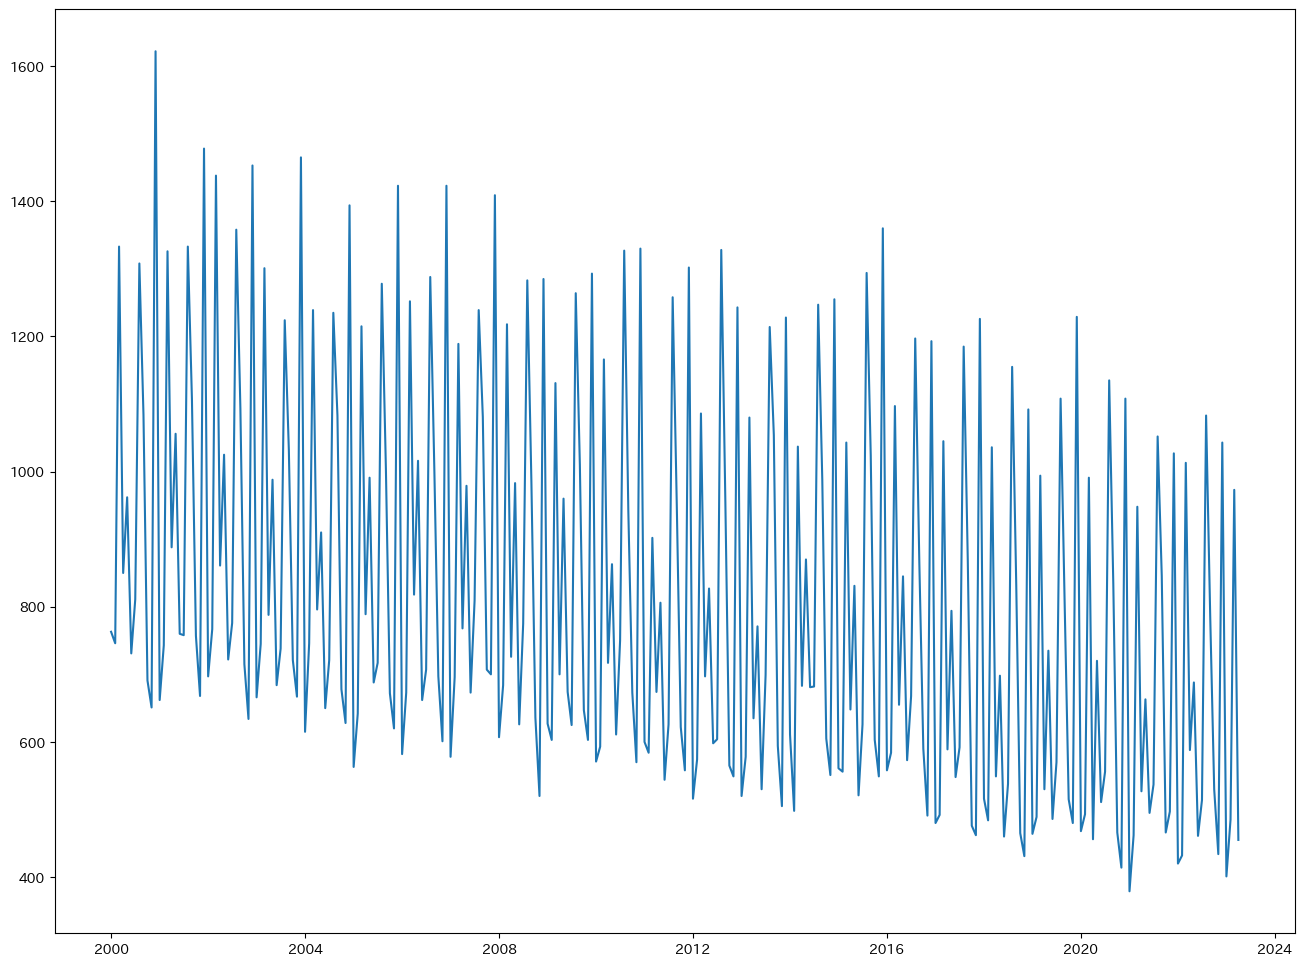

In [8]:

# 図表描画
# 年月（「年月」)をx軸、支出額（円）にして描画
# ここでは世帯区分　3　描画

# データのプロット　年月軸目盛
fig1, ax1 = plt.subplots(figsize=(16, 12))
ax1.plot(dfh3['datetime'], dfh3['円'])

# x軸の目盛り設定
ax1.xaxis.set_major_locator(mdates.YearLocator())  # 目盛りを年単位で表示
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 目盛りの表示形式を指定

# x軸の範囲設定
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-04-01')  # データ更新時は、最終日の日付に合わせて調整
ax1.set_xlim(start_date, end_date)

# y軸の範囲と目盛りを設定
start_value = 0
end_value = 1800
step = 200
ax1.set_ylim(start_value, end_value)
ax1.set_yticks(range(start_value, end_value + 1, step))

# x軸のラベルを設定
ax1.set_xlabel('年月')

# y軸のラベルを設定
ax1.set_ylabel('月次支出額（円）', fontsize=12)

# グラフのタイトルを設定
ax1.set_title('月別 世帯支出 切り花 2人以上世帯 2000年1月-2023年4月', fontsize=14)



In [9]:
# 時系列データから、トレンドと周期成分を分けて取り出す
# I  SLT（Seasonal and Trend decomposition using Loess）モデル
# ローカル回帰平滑化法（Loess）を使用 Loessは、局所的な近傍データの重み付き平均を計算、滑らかな曲線をデータに適合させる手法
# 時系列データを季節成分、トレンド成分、残差成分に分解
# 季節調整やトレンドの把握、季節パターンの特定
# 季節性の除去: データから季節成分を推定・除去　ローカルな回帰スムージング（Loess）を用いて季節成分を推定　各データ点の周囲のデータを参照してスムージング　データの局所的な特徴を反映
# トレンドの推定: 季節成分を除去したデータに対して、トレンド成分を推定　トレンド推定には、ローカルな回帰スムージング（Loess）を再度使用
# 残差の計算: 季節成分とトレンド成分を元のデータから除去

import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# 時系列データを読み込み、日付と値だけのdfにする
datah3 = dfh3[['datetime','円']]

# 円のデータ列を数値に変換
datah3['円'] = datah3['円'].astype(float)

# 日付型の列をインデックスとして設定
datah3.set_index('datetime', inplace=True)



C:\Users\gv\AppData\Local\Temp\ipykernel_19228\67714048.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datah3['円'] = datah3['円'].astype(float)


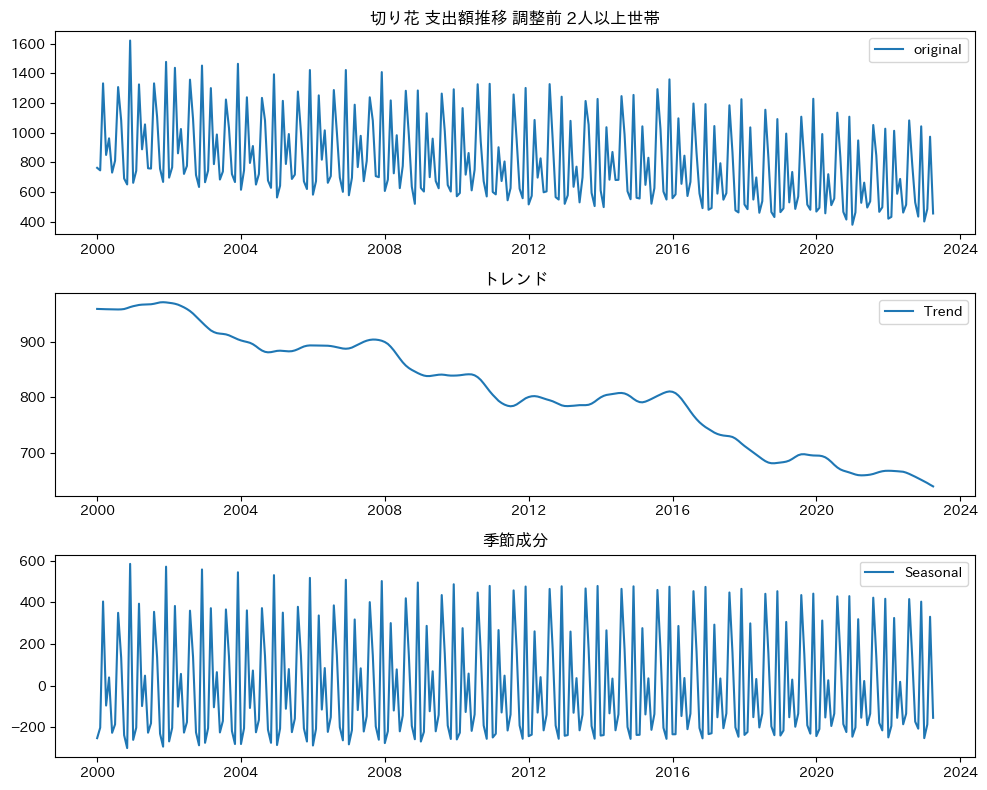

In [10]:


# 季節調整の実行
stl3 = STL(datah3['円'], seasonal=13)  # 季節周期を指定
result = stl3.fit()

# トレンド、季節成分、残差の取得
trend3 = result.trend
seasonal3 = result.seasonal
residual3 = result.resid

# グラフの描画
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(datah3.index, datah3['円'], label='original')
axes[0].set_title('切り花 支出額推移 調整前 2人以上世帯')
axes[0].legend()

axes[1].plot(trend3, label='Trend')
axes[1].set_title('トレンド')
axes[1].legend()

axes[2].plot(seasonal3, label='Seasonal')
axes[2].set_title('季節成分')
axes[2].legend()

plt.tight_layout()
plt.show()
